# Feature Engineering

### Importing Data

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Display 100 columns max
pd.set_option('display.max_columns', 100)

# Display 20 characters max within a cell
# pd.set_option('max_colwidth',60)

In [11]:
df = pd.read_pickle("scout_no_missiing.pkl")

In [12]:
df.shape

(8984, 113)

In [13]:
# Check to see if there are missing values
df.isna().sum(axis=1).sum()

0

## Price (Target)

In [23]:
df.price.describe()

count     8982.000000
mean     18256.133378
std       6804.634015
min         13.000000
25%      13900.000000
50%      17000.000000
75%      21550.000000
max      74600.000000
Name: price, dtype: float64

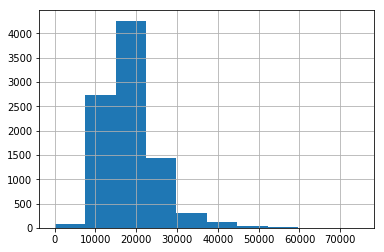

In [25]:
df.price.hist()

In [26]:
sum(df.price < 1000)

3

In [27]:
df = df[df.price > 1000]

In [28]:
df.shape

(8979, 150)

## Fuel

In [14]:
fuel_dict = {r'Diesel.*': 'diesel', 
             r'(Gasoline|Super|Regular).*': 'gasoline',
             r'.*(LPG|CNG|gas).*': 'lpg', 
             r'Electric.*':'electric',
             r'Others.*': np.nan
            }
df.fuel.replace(fuel_dict, regex = True, inplace=True)

In [15]:
df.dropna(inplace = True)

In [29]:
df.shape

(8979, 150)

## Dummy Variables (From the Dataset)

In [7]:
# # Create a new column with sum of dummy values (total number of car attributes)
# df['ss_sum'] = df.filter(like="ss_").sum(axis=1)
# df['cc_sum'] = df.filter(like="cc_").sum(axis=1)
# df['ext_sum'] = df.filter(like="ext_").sum(axis=1)
# df['ent_sum'] = df.filter(like="ent_").sum(axis=1)

## Encoding Categorical Variables

In [30]:
df.select_dtypes(exclude='number').columns

Index(['first_registration'], dtype='object')

In [31]:
pd.get_dummies(df).shape

(8979, 150)

In [32]:
df = pd.get_dummies(df)

## Save Data for Modeling

In [33]:
# Save the new dataset to pickle
df.to_pickle('scout_for_model.pkl')